In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
import graphviz
from sklearn.metrics import roc_auc_score, f1_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('spy_train_set.csv', index_col='period')
# test = pd.read_csv('googl_test_set.csv', index_col='period')
data.tail()

data = data.reset_index()[~(pd.to_datetime(data.reset_index().period).dt.time.isin([dt.time(hour=9,minute=30), dt.time(hour=15,minute=55)]))]
data = data.set_index(['period'])
#data.drop(,axis=0)

In [7]:

X = data.drop(columns=['y'])
y = data.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,stratify=y, random_state=0)
# X_test = test.drop(columns=['y'])
# y_test = test.loc[:,'y']
X_train.shape

(228, 42)

In [9]:
# Initial model
xgb0 = xgb.XGBClassifier(learning_rate = 0.001, n_estimators = 2000, n_jobs = -1)
xgbtrain = xgb.DMatrix(X_train.values, y_train.values)

#Cross validaion
cvresult = xgb.cv(xgb0.get_params(), xgbtrain, num_boost_round=xgb0.get_params()['n_estimators'],
                  nfold=3,metrics='auc', early_stopping_rounds=5000, verbose_eval=1)
cvresult


[0]	train-auc:0.94919+0.01915	test-auc:0.57334+0.02349
[1]	train-auc:0.95434+0.01422	test-auc:0.56884+0.02081
[2]	train-auc:0.95381+0.01391	test-auc:0.57149+0.01996
[3]	train-auc:0.95446+0.01407	test-auc:0.57088+0.01557
[4]	train-auc:0.95398+0.01340	test-auc:0.57193+0.01352
[5]	train-auc:0.95416+0.01391	test-auc:0.57076+0.01557
[6]	train-auc:0.95416+0.01391	test-auc:0.57099+0.01558
[7]	train-auc:0.95474+0.01367	test-auc:0.57042+0.01677
[8]	train-auc:0.95415+0.01350	test-auc:0.57102+0.01588
[9]	train-auc:0.95480+0.01373	test-auc:0.56985+0.01796
[10]	train-auc:0.95421+0.01356	test-auc:0.57291+0.01387
[11]	train-auc:0.95445+0.01379	test-auc:0.57137+0.01559


[12]	train-auc:0.95433+0.01367	test-auc:0.57268+0.01389
[13]	train-auc:0.95486+0.01379	test-auc:0.56985+0.01796


c:\Users\zeyad\Desktop\Intraday\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[14]	train-auc:0.95421+0.01356	test-auc:0.57125+0.01588
[15]	train-auc:0.95486+0.01379	test-auc:0.56997+0.01797
[16]	train-auc:0.95427+0.01362	test-auc:0.57128+0.01619
[17]	train-auc:0.95457+0.01391	test-auc:0.57220+0.01445
[18]	train-auc:0.95421+0.01356	test-auc:0.57291+0.01387
[19]	train-auc:0.95486+0.01379	test-auc:0.57092+0.01678
[20]	train-auc:0.95433+0.01367	test-auc:0.57128+0.01619
[21]	train-auc:0.95469+0.01403	test-auc:0.56960+0.01765
[22]	train-auc:0.95433+0.01367	test-auc:0.57125+0.01588
[23]	train-auc:0.95463+0.01397	test-auc:0.56971+0.01766
[24]	train-auc:0.95439+0.01332	test-auc:0.57268+0.01389
[25]	train-auc:0.95486+0.01379	test-auc:0.57055+0.01646
[26]	train-auc:0.95672+0.01575	test-auc:0.57243+0.01443
[27]	train-auc:0.95696+0.01601	test-auc:0.57068+0.01707
[28]	train-auc:0.95672+0.01575	test-auc:0.57149+0.01530
[29]	train-auc:0.95684+0.01631	test-auc:0.57078+0.01617
[30]	train-auc:0.95678+0.01581	test-auc:0.57220+0.01472
[31]	train-auc:0.95768+0.01726	test-auc:0.57303+

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.949193,0.019146,0.573344,0.023492
1,0.954340,0.014225,0.568839,0.020813
2,0.953807,0.013909,0.571491,0.019964
3,0.954455,0.014066,0.570878,0.015571
4,0.953977,0.013395,0.571927,0.013521
...,...,...,...,...
1995,1.000000,0.000000,0.594879,0.031442
1996,1.000000,0.000000,0.594642,0.031777
1997,1.000000,0.000000,0.594642,0.031777
1998,1.000000,0.000000,0.594642,0.031777


In [11]:
#{'neg_root_mean_squared_error', 'jaccard_samples', 'adjusted_mutual_info_score', 'roc_auc_ovo_weighted',
#'balanced_accuracy', 'jaccard_weighted', 'recall_macro', 'precision_macro', 'recall', 'explained_variance',
#'neg_negative_likelihood_ratio', 'roc_auc_ovr', 'f1_macro', 'neg_mean_squared_log_error', 'neg_mean_gamma_deviance',
#'adjusted_rand_score', 'neg_mean_absolute_percentage_error', 'f1_weighted', 'recall_weighted', 'top_k_accuracy', 'max_error',
#'neg_root_mean_squared_log_error', 'recall_micro', 'jaccard_micro', 'accuracy', 'rand_score', 'completeness_score', 'precision',
#'precision_weighted', 'positive_likelihood_ratio', 'homogeneity_score', 'matthews_corrcoef', 'neg_log_loss', 'neg_mean_squared_error',
#'v_measure_score', 'roc_auc_ovr_weighted', 'neg_median_absolute_error', 'recall_samples', 'jaccard_macro', 'fowlkes_mallows_score',
#'precision_micro', 'r2', 'average_precision', 'neg_mean_absolute_error', 'f1_micro', 'jaccard', 'roc_auc_ovo', 'mutual_info_score',
#'roc_auc', 'f1_samples', 'f1', 'normalized_mutual_info_score', 'precision_samples', 'neg_mean_poisson_deviance', 'neg_brier_score'}

# setup parameters for xgboost
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['learning_rate'] = 0.001
param['n_estimators'] = int(cvresult.shape[0])
param['early_stopping_rounds'] = False
param['gamma'] = 0
param['max_depth'] = 3
param['min_child_weight']=4
param['max_delta_step'] = 0
param['subsample']= 0.6
param['colsample_bytree']=0.5
param['seed'] = 0
param['base_score'] = 0.5

xgb1 = xgb0.set_params(**param)
xgb1 = xgb1.fit(X_train, y_train)

# ############
# ###############
# #GridSearch params
# ###################
params = {
    'max_depth': [1,2,3],
    'subsample':[0.1,0.3,0.5],
    'colsample_bytree':[0.1,0.3,0.5],
    'min_child_weight':[4,6,10]
}

# Grid search
gridsearch = GridSearchCV(estimator = xgb1, param_grid = params,
                          cv = StratifiedKFold(n_splits = 3), scoring='average_precision', verbose=3, n_jobs = -1).fit(X_train, y_train)
xgb1 = xgb1.set_params(
    max_depth = gridsearch.best_params_['max_depth'],
    colsample_bytree= gridsearch.best_params_['colsample_bytree'],
    subsample= gridsearch.best_params_['subsample'],
    min_child_weight = gridsearch.best_params_['min_child_weight']
 )
xgb1


Fitting 3 folds for each of 81 candidates, totalling 243 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=False,
              enable_categorical=False, eta=0.3, eval_metric='error',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=1,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [12]:
def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varing the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob > threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return y_pred_with_threshold

c = 0.5
y_probs = xgb1.predict_proba(X_train)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_train, y_pred)}')
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))  
print('\n\n\nTest data')

y_probs = xgb1.predict_proba(X_test)
y_pred_test = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))  

AUC: 0.8316579028765851
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       106
         1.0       0.81      0.92      0.86       122

    accuracy                           0.84       228
   macro avg       0.85      0.83      0.83       228
weighted avg       0.84      0.84      0.84       228

[[ 79  27]
 [ 10 112]]



Test data
AUC: 0.5023943770757704
              precision    recall  f1-score   support

         0.0       0.47      0.33      0.39       107
         1.0       0.53      0.68      0.60       121

    accuracy                           0.51       228
   macro avg       0.50      0.50      0.49       228
weighted avg       0.50      0.51      0.50       228

[[35 72]
 [39 82]]


In [94]:
indices = [i for i in range(len(y_train)) if y_train[i] != y_pred[i]]
X_train.iloc[indices,:][data.y==0].sort_index()

C:\Users\zeyad\AppData\Local\Temp\ipykernel_23032\2986657182.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\zeyad\AppData\Local\Temp\ipykernel_23032\2986657182.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,vpoc_1,total_volume_1,vpoc_tpoc_dist_1,vpoc_close_dist_1,tpoc_close_dist_1,vpoc_price_high_dist_1,vpoc_price_low_dist_1,tpoc_price_high_dist_1,tpoc_price_low_dist_1,price_std_1,...,price_kurt_1_2,vol_price_std_1_2,vol_price_skew_1_2,vol_price_kurt_1_2,trapped_longs_1_2,trapped_shorts_1_2,trapped_shorts_at_extremes_1_2,trapped_longs_at_extremes_1_2,rvol,rvpoc
period,,,,,,,,,,,,,,,,,,,,,
2024-03-26 14:00:00,6200.0,46997.0,-0.184,-0.176,0.008,-0.194,0.026,-0.010,0.210,0.069,...,-0.460,950.870,1.355,1.152,1.0,0.0,0.0,1.0,1.724091,1.823529
2024-03-26 15:15:00,7007.0,72927.0,0.000,0.050,0.050,-0.078,0.050,-0.078,0.050,0.029,...,-1.422,814.186,1.662,2.779,1.0,0.0,0.0,0.0,1.627689,2.035144
2024-03-27 09:35:00,22110.0,259079.0,-0.236,-0.159,0.077,-0.299,0.167,-0.063,0.403,0.122,...,-0.911,27825.082,7.294,53.760,1.0,0.0,0.0,1.0,0.564519,0.105356
2024-03-27 09:55:00,12077.0,145455.0,-0.137,-0.065,0.072,-0.321,0.069,-0.184,0.206,0.080,...,0.316,3210.019,2.482,6.450,1.0,0.0,0.0,0.0,0.883258,0.783915
2024-03-27 15:40:00,25492.0,495221.0,0.243,-0.227,-0.470,-0.227,0.285,-0.470,0.042,0.119,...,0.100,4181.880,2.565,11.009,0.0,1.0,0.0,0.0,1.526876,0.943868
2024-03-27 15:55:00,158585.0,1667996.0,0.349,0.000,-0.349,0.000,0.502,-0.349,0.153,0.100,...,0.550,9866.970,1.715,3.305,0.0,1.0,0.0,0.0,1.936171,3.175956
2024-03-28 10:00:00,15842.0,140691.0,0.095,-0.133,-0.228,-0.193,0.206,-0.288,0.111,0.104,...,-1.126,674.042,0.998,1.106,1.0,0.0,0.0,0.0,2.745726,4.963033
2024-03-28 10:40:00,4749.0,48810.0,-0.091,-0.131,-0.040,-0.181,0.077,-0.090,0.168,0.072,...,-0.407,1004.240,1.556,2.575,1.0,0.0,0.0,1.0,0.876427,1.011071
2024-03-28 11:35:00,3827.0,64634.0,0.039,0.094,0.055,-0.065,0.127,-0.104,0.088,0.044,...,-0.774,1888.803,2.871,11.165,1.0,0.0,0.0,1.0,0.817779,0.354450


In [ ]:
y_probs = xgb1.predict_proba(X_test)
precision = []
for threshold in np.arange(0,1, step=0.05):
    y_pred = tune_threshold(y_probs, threshold=threshold)
    print(f1_score(y_test,y_pred_test))
    precision.append(f1_score(y_test,y_pred_test))
px.line(x=np.arange(0,1, step=0.05), y=precision)

    # print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    # print(classification_report(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))  

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

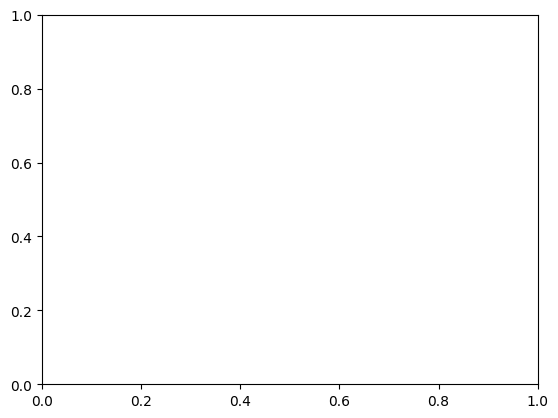

In [88]:
plot_tree(xgb1)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

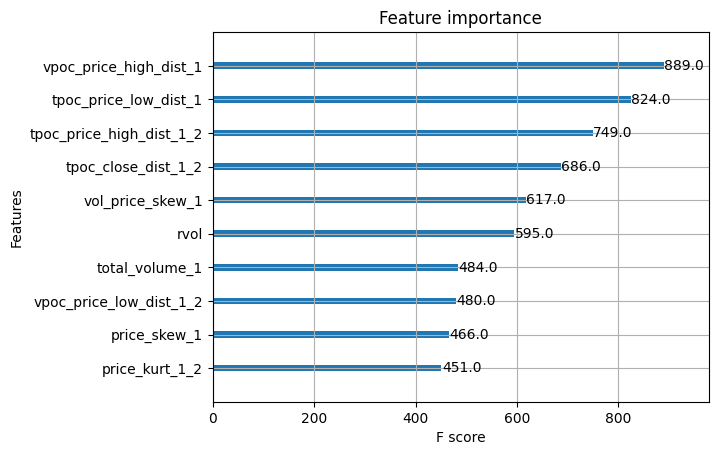

In [93]:
xgb.plot_importance(xgb1,max_num_features=10)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

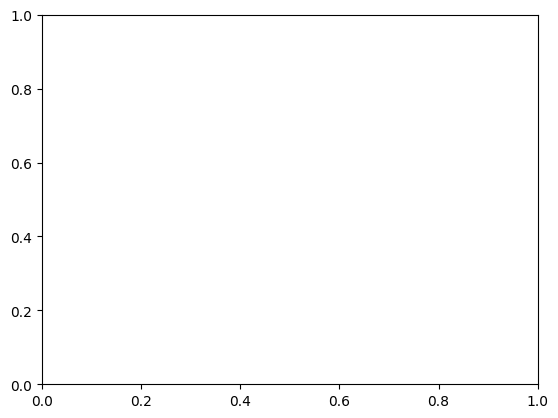

In [85]:
plot_tree(xgb1)